In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit_treadmill.csv

--2023-03-11 15:42:49--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.176, 108.157.172.10, 108.157.172.183, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-03-11 15:42:49 (1.22 GB/s) - ‘aerofit_treadmill.csv’ saved [7279/7279]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("aerofit_treadmill.csv")

# Defining Problem Statement and Analysing basic metrics

#### Lets check the data, dataypes of all attributes, see if we need to impute null values, length of data, coversion of data if required

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data.shape # Checking the length of data (Rows = 180, columns=9)

(180, 9)

In [ ]:
data.isnull().sum() ## There seems to be no null values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
data.info() ## checking the data type, It seems Age, Education, Usage, Fitness, Income, Miles are in integers, which may help further establish a corelation between them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
data.describe() ## Statistical Summary on Data

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
data.describe(include = 'object') ## Summary on Object data types

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


# Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
data['Product'].value_counts() # checking number of unique products along with their values

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
min_age = data['Age'].min() # Age group of the data lies between 18-50, Average age of people in the dataset
max_age = data['Age'].max() 
avg_age = round(data['Age'].mean(),2)
print (f'Minimum age is {min_age}, and Maximum age is {max_age}')
print(f"Average age is {avg_age}")

Minimum age is 18, and Maximum age is 50
Average age is 28.79


In [ ]:
data['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [ ]:
data['Gender'].value_counts() ## Total Males and females

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
data['Education'].value_counts() ## People falling under different education Category

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [ ]:
##### Let us make changes to Education Category so it will be easy to evaluate, will add an additional column explaining the degree obtained
#####  Typically 12 years of Education means completing Higher Secondary - 12th Standard
#####  13 Years - 1st year
#####  14 years - 2nd year or Associate
#####  15 years - 3rd Year
#####  16 years - Bachelors
#####  18 years - Masters
#####  20 years - MPhil
#####  21 years - Phd (usually phd requires 3-4 years so under simple assumption lets take it 21 years as degree equivalent to phd)   

In [ ]:
bins = [0,12,13, 14,15,16,18,20,21]
labels = ["Higher Secondary", "1st year", "2nd year or Associate", "3rd Year", "Bachelors", "Masters", "MPhil", "Phd"]

data['Education Category'] = pd.cut(data['Education'],bins, labels = labels )

In [ ]:
data = data[['Product','Age', 'Gender',	'Education',	'Education Category',	'MaritalStatus',	'Usage',	'Fitness',	'Income',	'Miles']]

In [ ]:
data.head()  ## after refining data we get below columns

,Product,Age,Gender,Education,Education Category,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,2nd year or Associate,Single,3,4,29562,112
1,KP281,19,Male,15,3rd Year,Single,2,3,31836,75
2,KP281,19,Female,14,2nd year or Associate,Partnered,4,3,30699,66
3,KP281,19,Male,12,Higher Secondary,Single,3,3,32973,85
4,KP281,20,Male,13,1st year,Partnered,4,2,35247,47


In [ ]:
data["MaritalStatus"].value_counts() ##See the marital status

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
data['Usage'].value_counts()  ## Average Usage Plan counts for a week

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
data['Income'].nunique()  ## analysis on Income column

62

In [ ]:
np.unique(data['Income'], return_counts=True)  ## We can see the income ranges from 29562 - 104581 (We can check the same using min and max)

(array([ 29562,  30699,  31836,  32973,  34110,  35247,  36384,  37521,
         38658,  39795,  40932,  42069,  43206,  44343,  45480,  46617,
         47754,  48556,  48658,  48891,  49801,  50028,  51165,  52290,
         52291,  52302,  53439,  53536,  54576,  54781,  55713,  56850,
         57271,  57987,  58516,  59124,  60261,  61006,  61398,  62251,
         62535,  64741,  64809,  65220,  67083,  68220,  69721,  70966,
         74701,  75946,  77191,  83416,  85906,  88396,  89641,  90886,
         92131,  95508,  95866,  99601, 103336, 104581]),
 array([ 1,  1,  2,  5,  5,  5,  4,  2,  5,  2,  6,  2,  5,  4, 14,  8,  2,
         2,  1,  5,  2,  7,  7,  1,  1,  9,  8,  1,  8,  1,  1,  2,  1,  4,
         1,  3,  3,  2,  2,  1,  1,  2,  3,  1,  2,  1,  1,  1,  1,  1,  1,
         2,  1,  2,  2,  3,  3,  1,  1,  1,  1,  2]))

In [ ]:
##### We can bin the incomes to get better understanding of data present inbetween values

In [ ]:
data['Income'].value_counts(bins=14, sort = False)

(29486.98, 34920.5]    14
(34920.5, 40279.0]     18
(40279.0, 45637.5]     31
(45637.5, 50996.0]     27
(50996.0, 56354.5]     37
(56354.5, 61713.0]     18
(61713.0, 67071.5]      8
(67071.5, 72430.0]      5
(72430.0, 77788.5]      3
(77788.5, 83147.0]      0
(83147.0, 88505.5]      5
(88505.5, 93864.0]      8
(93864.0, 99222.5]      2
(99222.5, 104581.0]     4
Name: Income, dtype: int64

In [ ]:
##### Analysis on Miles column

In [ ]:
data['Miles'].describe() ## Average miles is 103.2, min = 21, max = 360

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [ ]:
data['Miles'].nunique() ## 37 unique values of miles

37

# Visual Analysis - Univariate & Bivariate

Univariate Visual Analysis

In [ ]:
a = len(data[data['Product']=='KP281'])/data['Product'].shape[0] * 100
b = len(data[data['Product']=='KP481'])/data['Product'].shape[0] * 100
c = len(data[data['Product']=='KP781'])/data['Product'].shape[0] * 100

############################Product##############################

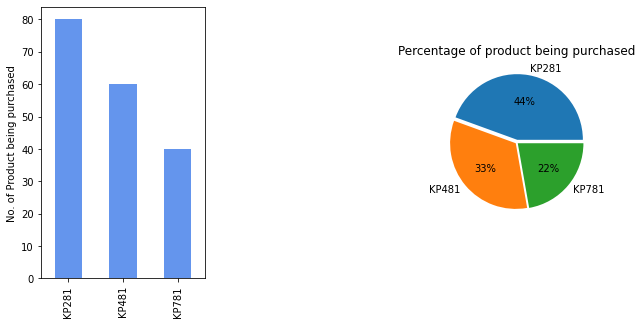

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
data['Product'].value_counts().plot(kind = 'bar', color ='cornflowerblue')
plt.ylabel("No. of Product being purchased")

plt.subplot(1,3,3)
data_for_pie = [a,b,c]
keys = ['KP281','KP481','KP781']
plt.pie(data_for_pie, labels =keys , explode=[0.04,0.02,0.02], autopct='%.0f%%')
plt.title("Percentage of product being purchased")
plt.show()

############################ Age ##############################

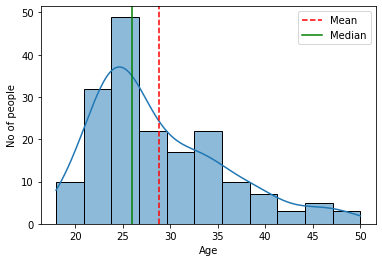

In [ ]:
mean_age = data['Age'].mean()
median_age = data['Age'].median()
sns.histplot(data, x='Age',kde=True )
plt.axvline(mean_age, color='r', linestyle='--', label='Mean')
plt.axvline(median_age, color='g', linestyle='-', label = 'Median')
plt.ylabel("No of people")
plt.legend()
plt.show()

############################ Gender ##############################

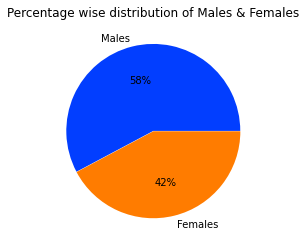

In [ ]:
m = len(data[data['Gender']=='Male'])/data.shape[0]
f =  len(data[data['Gender']=='Female'])/data.shape[0]
data_male_female= [m,f]
keys = ['Males','Females']
color = sns.color_palette('bright')
plt.pie(data_male_female, labels=keys, colors=color, autopct= '%.0f%%', explode=[.002,.002])
plt.title("Percentage wise distribution of Males & Females")
plt.show()

########################### Education #############################

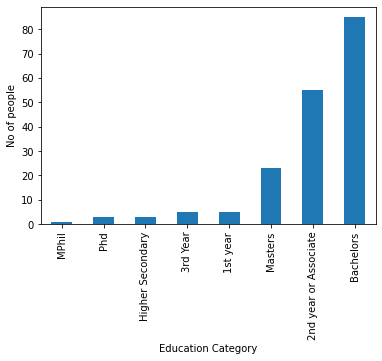

In [ ]:
data['Education Category'].value_counts()[::-1].plot(kind='bar')
plt.xlabel("Education Category")
plt.ylabel("No of people")
plt.show()

######################### Marital Status ############################

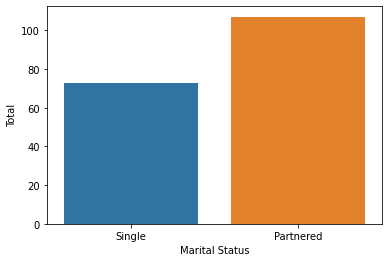

In [ ]:
sns.countplot(x=data["MaritalStatus"])
plt.xlabel("Marital Status")
plt.ylabel("Total")
plt.show()

############################ Usage ##############################

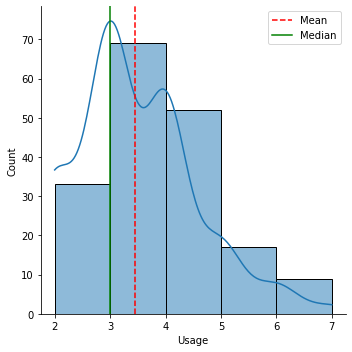

In [ ]:
mean_usage = data['Usage'].mean()
median_usage = data['Usage'].median()
sns.displot(x=data['Usage'],kde=True, bins = 5)
plt.axvline(mean_usage, color='r', linestyle='--', label='Mean')
plt.axvline(median_usage, color='g', linestyle='-', label = 'Median')
plt.legend()
plt.show()

############################ Fitness ##############################

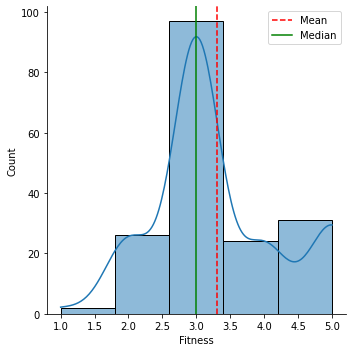

In [ ]:
mean_fit = data['Fitness'].mean()
median_fit = data['Fitness'].median()
sns.displot(x=data['Fitness'],kde=True, bins = 5)
plt.axvline(mean_fit, color='r', linestyle='--', label='Mean')
plt.axvline(median_fit, color='g', linestyle='-', label = 'Median')
plt.legend()
plt.show()

############################ Income ##############################

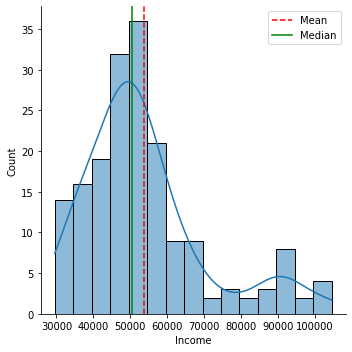

In [ ]:
mean_income = data['Income'].mean()
median_income = data['Income'].median()
sns.displot(x=data['Income'],kde=True)
plt.axvline(mean_income, color='r', linestyle='--', label='Mean')
plt.axvline(median_income, color='g', linestyle='-', label = 'Median')
plt.legend()
plt.show()

############################ Miles ##############################

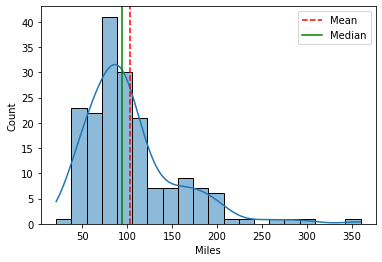

In [ ]:
mean_miles = data['Miles'].mean()
median_miles = data['Miles'].median()
sns.histplot(x=data['Miles'],kde=True)
plt.axvline(mean_miles, color='r', linestyle='--', label='Mean')
plt.axvline(median_miles, color='g', linestyle='-', label = 'Median')
plt.legend()
plt.show()

Bivariate & Multivariate Visual Analysis

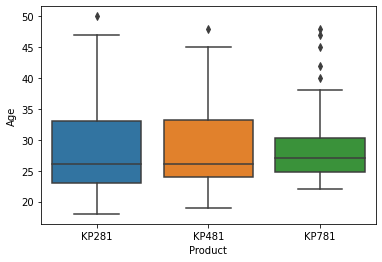

In [ ]:
sns.boxplot(data=data, x = 'Product', y = 'Age')
plt.show()

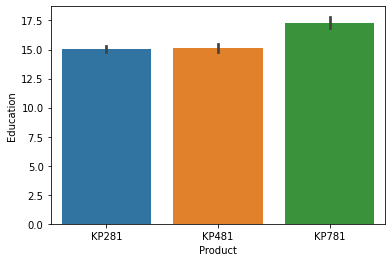

In [ ]:
sns.barplot(data = data, x = "Product", y = 'Education', estimator = np.mean)
plt.show()

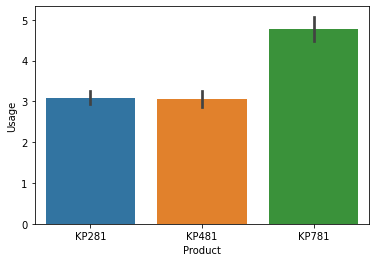

In [ ]:
sns.barplot(data = data, x = "Product", y = 'Usage', estimator =np.mean)
plt.show()

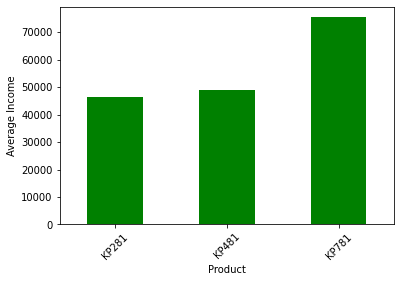

In [ ]:
data.groupby(['Product'])['Income'].mean().plot(kind='bar', color='g')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()

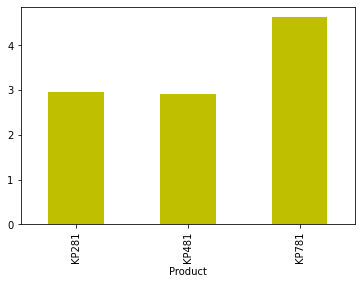

In [ ]:
data.groupby(['Product'])['Fitness'].mean().plot(kind='bar', color='y')
plt.show()

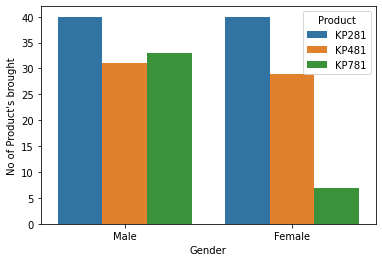

In [ ]:
sns.countplot(x=data['Gender'], hue=data['Product'])
plt.ylabel("No of Product's brought")
plt.show()

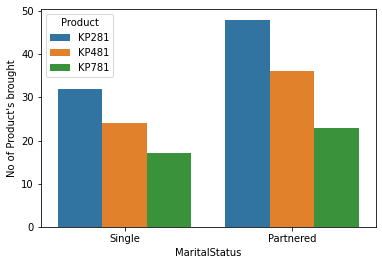

In [ ]:
sns.countplot(x=data['MaritalStatus'], hue=data['Product'])
plt.ylabel("No of Product's brought")
plt.show()

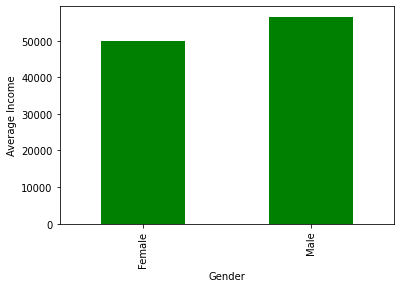

In [ ]:
data.groupby(['Gender'])['Income'].mean().plot(kind='bar', color='g')
plt.ylabel("Average Income")
plt.show()

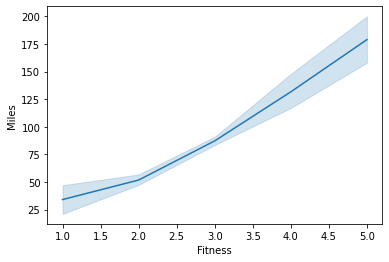

In [ ]:
sns.lineplot(data = data, x= 'Fitness', y = 'Miles')
plt.show()

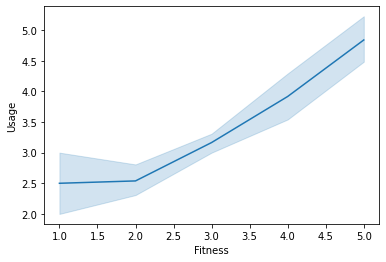

In [ ]:
sns.lineplot(data=data, x='Fitness', y='Usage')
plt.show()

In [ ]:
data.head()

,Product,Age,Gender,Education,Education Category,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,2nd year or Associate,Single,3,4,29562,112
1,KP281,19,Male,15,3rd Year,Single,2,3,31836,75
2,KP281,19,Female,14,2nd year or Associate,Partnered,4,3,30699,66
3,KP281,19,Male,12,Higher Secondary,Single,3,3,32973,85
4,KP281,20,Male,13,1st year,Partnered,4,2,35247,47


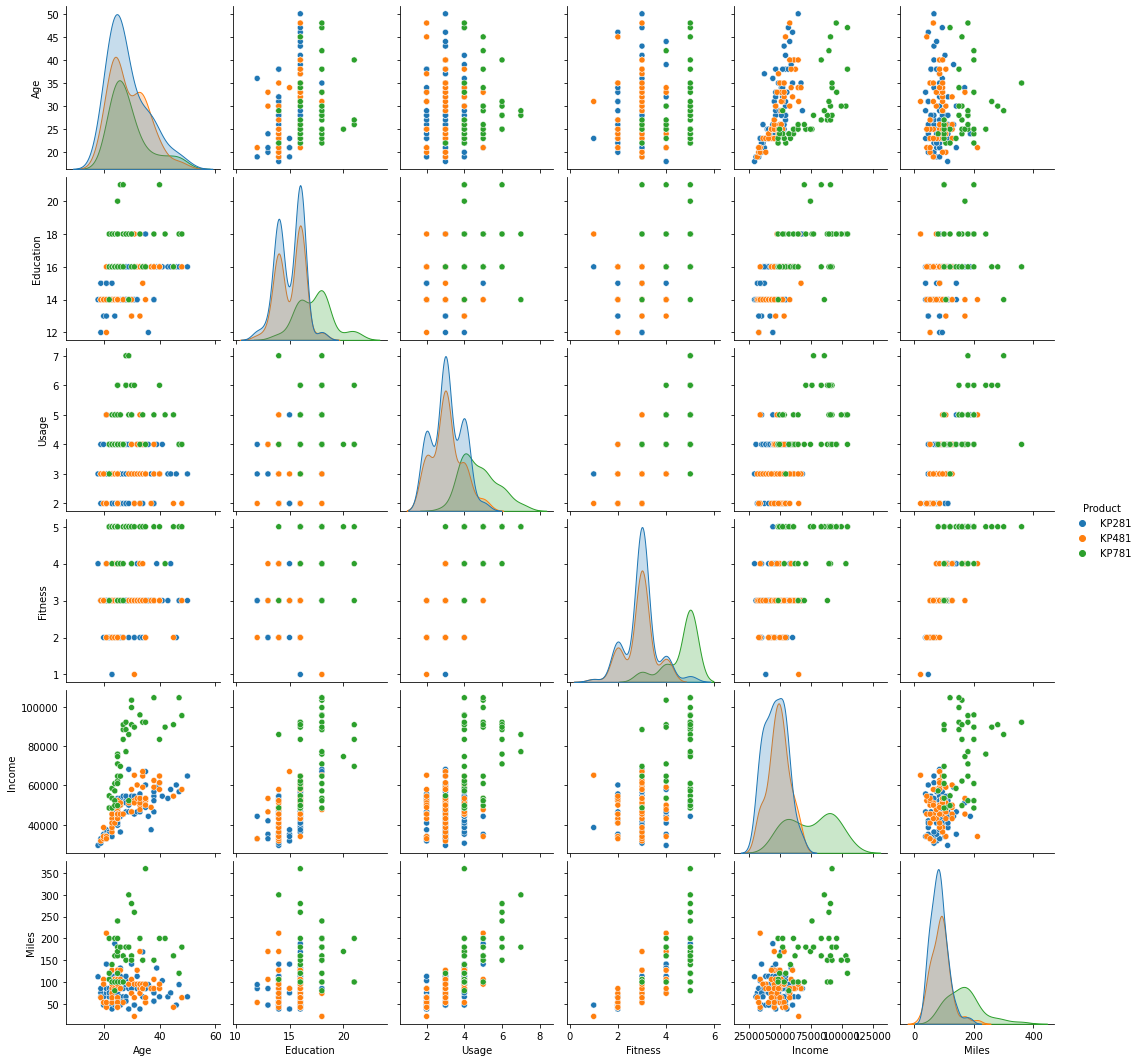

In [ ]:
sns.pairplot(data, hue='Product')
plt.show()

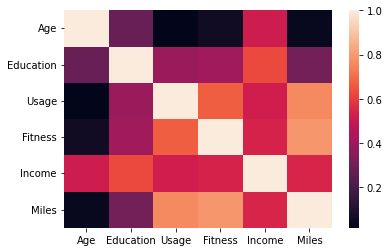

In [ ]:
sns.heatmap(data.corr())
plt.show()

# Missing Value & Outlier Detection

In [ ]:
## We can see that there is no Missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Product             180 non-null    object  
 1   Age                 180 non-null    int64   
 2   Gender              180 non-null    object  
 3   Education           180 non-null    int64   
 4   Education Category  180 non-null    category
 5   MaritalStatus       180 non-null    object  
 6   Usage               180 non-null    int64   
 7   Fitness             180 non-null    int64   
 8   Income              180 non-null    int64   
 9   Miles               180 non-null    int64   
dtypes: category(1), int64(6), object(3)
memory usage: 13.3+ KB


In [ ]:
## Lets try detect outliers using boxplot first

In [ ]:
data.head()

,Product,Age,Gender,Education,Education Category,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,2nd year or Associate,Single,3,4,29562,112
1,KP281,19,Male,15,3rd Year,Single,2,3,31836,75
2,KP281,19,Female,14,2nd year or Associate,Partnered,4,3,30699,66
3,KP281,19,Male,12,Higher Secondary,Single,3,3,32973,85
4,KP281,20,Male,13,1st year,Partnered,4,2,35247,47


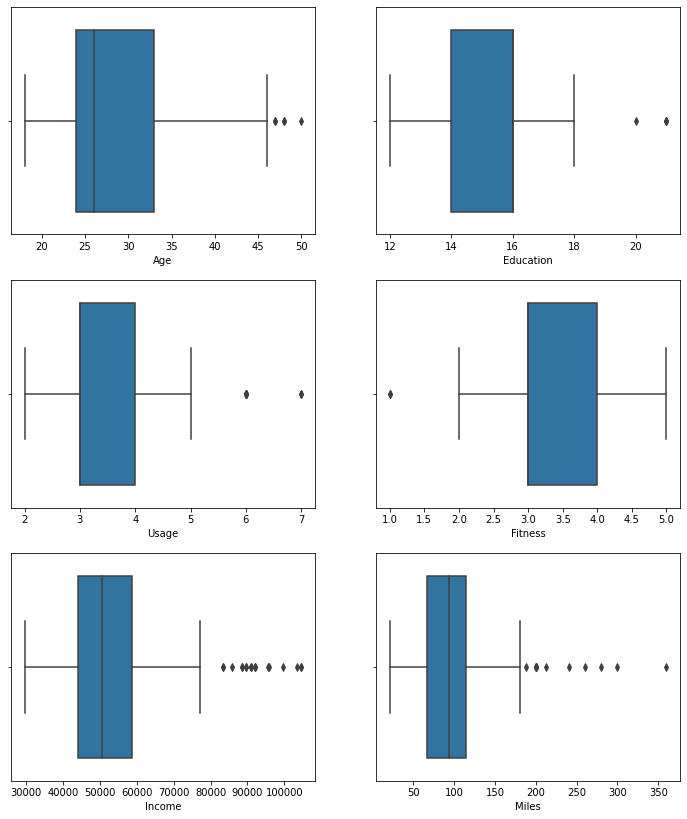

In [ ]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(top=1.2)
plt.subplot(3,2,1)
sns.boxplot(data= data, x='Age', orient='h')

plt.subplot(3,2,2)
sns.boxplot(data= data, x='Education', orient='h')

plt.subplot(3,2,3)
sns.boxplot(data= data, x='Usage', orient='h')


plt.subplot(3,2,4)
sns.boxplot(data= data, x='Fitness', orient='h')

plt.subplot(3,2,5)
sns.boxplot(data= data, x='Income', orient='h')

plt.subplot(3,2,6)
sns.boxplot(data= data, x='Miles', orient='h')
plt.show()

We can see that Income and Miles have lot of outliers where as Age, Education, Usage, fitness has less outliers

In [ ]:
##Other ways of detecting Outliers, using IQR or Z score

In [ ]:
## By Calculating IQR
out_data = ['Age','Education', 'Usage', 'Fitness', 'Income','Miles']

for i in range (6):
  x_25 = np.percentile(data[out_data[i]],25)
  x_75 = np.percentile(data[out_data[i]],75)
  iqr = x_75 - x_25
  lower_limit = max(x_25 - 1.5*(iqr),0)
  upper_limit = x_75 + 1.5*(iqr)
  print(f"Upper Limit of {out_data[i]}:{upper_limit} & Lower Limit of {out_data[i]}:{lower_limit}")
  print()

Upper Limit of Age:46.5 & Lower Limit of Age:10.5

Upper Limit of Education:19.0 & Lower Limit of Education:11.0

Upper Limit of Usage:5.5 & Lower Limit of Usage:1.5

Upper Limit of Fitness:5.5 & Lower Limit of Fitness:1.5

Upper Limit of Income:80581.875 & Lower Limit of Income:22144.875

Upper Limit of Miles:187.875 & Lower Limit of Miles:0



In [ ]:
## With help of z score

out_data = ['Age','Education', 'Usage', 'Fitness', 'Income','Miles']

for i in range (6):
  x_mean = data[out_data[i]].mean()
  x_std = data[out_data[i]].std()
  outlier = []
  for j in data[out_data[i]]:
    z = (j-x_mean) / x_std
    if z > 3 or z<-3:
      outlier.append(j)
  print(f"The outlier for {out_data[i]}: {np.unique(outlier)}")
  print()

  


The outlier for Age: [50]

The outlier for Education: [21]

The outlier for Usage: [7]

The outlier for Fitness: []

The outlier for Income: [103336 104581]

The outlier for Miles: [260 280 300 360]



# Business Insights based on Non-Graphical and Visual Analysis

In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


1) Dataset has total of 180 rows.

2) Mean age is 28.8 years, mean education is 15, income - 53719.

3) 75% of people are less than 33 years old.

4) Standard Deviation of Incomes and Miles are quite high which indicates more outliers

In [ ]:
data.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


1) Males dominates in product purchase 

2) KP281 is purchased most of the time

3) Partnered are more likely to buy the products

In [ ]:
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


1) Age is highly related to more income which inturn leads to more people buying KP781

2) Same goes with Education, it is more related to income and people above 16 years of education are more likely to buy KP781


3) The more fit a person is, more likely he is to use the product

4) Income is highly related to Education, Usage, Fitness

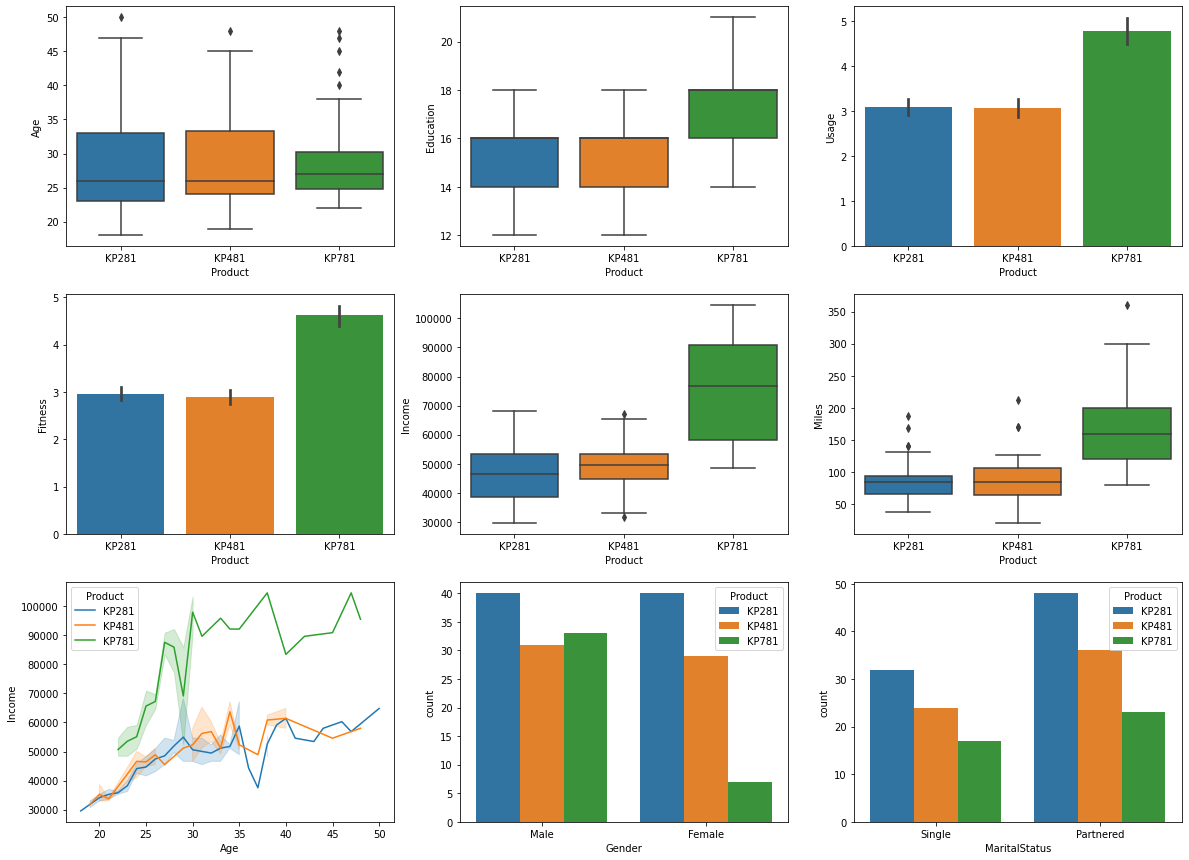

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(data=data, x = 'Product', y = 'Age')

plt.subplot(3,3,2)
sns.boxplot(data = data, x = "Product", y = 'Education')

plt.subplot(3,3,3)
sns.barplot(data = data, x = "Product", y = 'Usage', estimator =np.mean)

plt.subplot(3,3,4)
sns.barplot(data=data, x='Product', y='Fitness', estimator=np.mean)

plt.subplot(3,3,5)
sns.boxplot (data=data, x='Product', y = 'Income')

plt.subplot(3,3,6)
sns.boxplot (data=data, x='Product', y = 'Miles')

plt.subplot(3,3,7)
sns.lineplot(data = data, x= 'Age', y = 'Income', hue='Product')


plt.subplot(3,3,8)
sns.countplot(x=data['Gender'], hue=data['Product'])

plt.subplot(3,3,9)
sns.countplot(x=data['MaritalStatus'], hue=data['Product'])
plt.show()

1) Customers whose age lies between 25-30, and whose education is greater than 16(Supposedly a Graduate or Above) are more likely to buy KP781 product.

2)Customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

3)Customers who are planning to use the product 4 or more than 4 times on an average are likely to purchase  KP781

4) The more the customer is fit, the more he plans to use, the higher the chances of the customer to purchase the KP781 product.

5) Higher the Income of the customer, higher the chances of the customer to purchase the KP781 product.

6) If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

7) Equal number of males and females have purchased KP281 product and Almost same for the product KP481.

8) Most of the Male customers have purchased the KP781 product.

9) Customers who are Partnered, are more  likely to purchase the product.

**Business Insights using Marginal & Conditional Probability**

In [ ]:
data['Product'].value_counts(normalize = True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [ ]:
df_gender_product = pd.crosstab(index= data['Gender'], columns=data['Product'], margins=True)
df_gender_product

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [ ]:
print(f"Probability of being a  Male buying Product: {round(len(data.loc[data['Gender']=='Male']) / data.shape[0],2)}")
print(f"Probability of being a Male buying Product: {round(len(data.loc[data['Gender']=='Female']) / data.shape[0],2)}")
print(f"Probability of Singles buying Product: {round(len(data.loc[data['MaritalStatus']=='Single']) / data.shape[0],2)}")
print(f"Probability of Partnered buying Product: {round (len(data.loc[data['MaritalStatus']=='Partnered'])/ data.shape[0],2)}")

Probability of being a  Male buying Product: 0.58
Probability of being a Male buying Product: 0.42
Probability of Singles buying Product: 0.41
Probability of Partnered buying Product: 0.59


In [ ]:
gender=['Male','Female']
product = data['Product'].unique().tolist()
for i in product:
  for j in gender:
    print(f"P({i}/{j}): {round(len(data[(data['Product']==i) & (data['Gender']==j)])/len(data[data['Gender']==j]),2)}")
    print()

P(KP281/Male): 0.38

P(KP281/Female): 0.53

P(KP481/Male): 0.3

P(KP481/Female): 0.38

P(KP781/Male): 0.32

P(KP781/Female): 0.09



In [ ]:
gender=['Male','Female']
status = data['MaritalStatus'].unique().tolist()
for i in status:
  for j in gender:
    print(f"P({i}/{j}): {round(len(data[(data['MaritalStatus']==i) & (data['Gender']==j)])/len(data[data['Gender']==j]),2)}")
    print()

P(Single/Male): 0.41

P(Single/Female): 0.39

P(Partnered/Male): 0.59

P(Partnered/Female): 0.61



1) Probability of a Random Person to buy **KP281 is 0.44**, similary probability of a random person to buy **KP481 is 0.33** & **KP781 is 0.22**

2)  Probabilty of Male/Female/Single/Partnered buying Products.

    Probability of being a  Male buying Product: 0.58
    Probability of being a Male buying Product: 0.42
    Probability of Singles buying Product: 0.41
    Probability of Partnered buying Product: 0.59

3) Conditional Probability i.e (Probability of buying products given he is a male/female/single/partnered)

    P(KP281/Male): 0.38
    P(KP281/Female): 0.53
    P(KP481/Male): 0.3
    P(KP481/Female): 0.38
    P(KP781/Male): 0.32
    P(KP781/Female): 0.09
    P(Single/Male): 0.41
    P(Single/Female): 0.39
    P(Partnered/Male): 0.59
    P(Partnered/Female): 0.61


# Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

1) KP781 can be sold as a premium product and Aerofit can Target Athelets to use the same as data shows more number of miles are being run in KP781 which suggest better endurance and comfort of the product.

2) KP781 is more popular among people within 22-30 years old who are earning well and specially Males. Aerofit can target ads to this age group(Social media mostly as this age group would be more active in Social Media). Host an event in corporate offices, colleges (Which will help promoting product & fitness).

3) Aerofit can provide special no cost EMI or discount coupons for their products to age group above 30 and to women, so they can relay the message of women empowerment and bringing more women to fitness program(May be show an advertisement).

4) KP281 seems to be the product most purchased. Aerofit can launch program of product upgradation with minimal cost and free trials.

5) KP281 & KP481 are brought by people with similar charactistics (in terms of years, education, income, usage, fitness). Aerofit can focus more into promoting KP481 - They can do so by either displaying KP481 products before KP281 in stores, or promoting the KP481 products with no cost EMI's or offering goodies with KP481. 